In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
users_data = pd.read_pickle("../data/users_data_final.pkl")# use .. also 
users_data.head() # preview data 

,user_id,number_transactions,total_amount_usd,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,term_deposit,date_joined,device
0,9231c446-cb16-4b2b-a7f7-ddfc8b25aaf6,3.0,2143.0,58,management,married,tertiary,False,True,False,None,261,1,-1,0,None,False,1998-08-23,mobile
1,bb92765a-08de-4963-b432-496524b39157,NaN,NaN,44,technician,single,secondary,False,True,False,None,151,1,-1,0,None,False,2008-07-15,desktop
2,573de577-49ef-42b9-83da-d3cfb817b5c1,2.0,2.0,33,entrepreneur,married,secondary,False,True,True,None,76,1,-1,0,None,False,2002-06-04,mobile
3,d6b66b9d-7c8f-4257-a682-e136f640b7e3,NaN,NaN,47,blue-collar,married,None,False,True,False,None,92,1,-1,0,None,False,1995-06-29,tablet
4,fade0b20-7594-4d9a-84cd-c02f79b1b526,1.0,1.0,33,None,single,None,False,False,False,None,198,1,-1,0,None,False,1995-08-01,mobile


In [3]:
users_data.shape # see shape of data

(45209, 19)

Question: How many rows and columns do we have?
 45209 rows and 19 coloumns 

In [4]:
print("# of rows:", users_data.shape[0])


# of rows: 45209


In [5]:
print("# of columns:", users_data.shape[1])

# of columns: 19


In [6]:
users_data.isnull().sum()

user_id                    0
number_transactions     9999
total_amount_usd        9999
age                        0
job                      288
marital                    0
education               1857
default                    0
housing                    0
loan                       0
contact                13018
duration                   0
campaign                   0
pdays                      0
previous                   0
poutcome               36957
term_deposit               0
date_joined               30
device                    94
dtype: int64

In [7]:
users_data.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45209 entries, 0 to 45215
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              45209 non-null  object        
 1   number_transactions  35210 non-null  float64       
 2   total_amount_usd     35210 non-null  float64       
 3   age                  45209 non-null  int64         
 4   job                  44921 non-null  object        
 5   marital              45209 non-null  object        
 6   education            43352 non-null  object        
 7   default              45209 non-null  bool          
 8   housing              45209 non-null  bool          
 9   loan                 45209 non-null  bool          
 10  contact              32191 non-null  object        
 11  duration             45209 non-null  int64         
 12  campaign             45209 non-null  int64         
 13  pdays                45209 non-

Question: How many numerical data types do we have?
int + object + 

In [8]:
users_data.age.describe()

count    45209.000000
mean        40.935853
std         10.618653
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

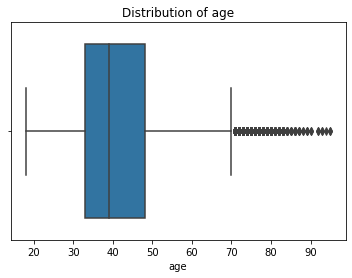

In [9]:
sns.boxplot(x = 'age',  data=users_data);
plt.title("Distribution of age");

C:\Users\2505s\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\2505s\Anaconda3\lib\site-packages\seaborn\distributions.py:2657: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\2505s\Anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\2505s\Anaconda3\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


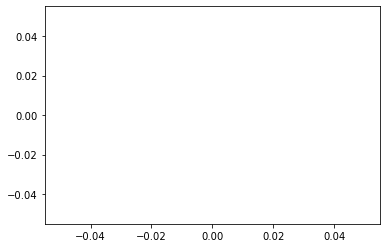

In [10]:
sns.distplot(); # i coudn't perform this operatioin

In [11]:
users_data = users_data.drop(labels= 'date_joined', axis = 1); # delete the data from the user data

In [12]:
list(users_data)

['user_id',
 'number_transactions',
 'total_amount_usd',
 'age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'term_deposit',
 'device']

In [13]:
categorical_cols = list(users_data.select_dtypes(['object']).columns) # for strings values 
categorical_cols


['user_id', 'job', 'marital', 'education', 'contact', 'poutcome', 'device']

In [14]:
numerial_coloums = list(users_data.select_dtypes(['float64']))
numerial_coloums

['number_transactions', 'total_amount_usd']

In [15]:
digits_coloumn = list(users_data.select_dtypes(['int64']))
digits_coloumn

['age', 'duration', 'campaign', 'pdays', 'previous']

In [16]:
all_num = numerial_coloums + digits_coloumn
all_num

['number_transactions',
 'total_amount_usd',
 'age',
 'duration',
 'campaign',
 'pdays',
 'previous']

In [17]:
users_data = users_data.drop(categorical_cols, axis= 1)


In [18]:
users_data

,number_transactions,total_amount_usd,age,default,housing,loan,duration,campaign,pdays,previous,term_deposit
0,3.0,2143.0,58,False,True,False,261,1,-1,0,False
1,NaN,NaN,44,False,True,False,151,1,-1,0,False
2,2.0,2.0,33,False,True,True,76,1,-1,0,False
3,NaN,NaN,47,False,True,False,92,1,-1,0,False
4,1.0,1.0,33,False,False,False,198,1,-1,0,False
...,...,...,...,...,...,...,...,...,...,...,...
45211,2.0,825.0,51,False,False,False,977,3,-1,0,True
45212,4.0,1729.0,71,False,False,False,456,2,-1,0,True
45213,2.0,5715.0,72,False,False,False,1127,5,184,3,True
45214,NaN,NaN,57,False,False,False,508,4,-1,0,False


In [19]:
users_data.isna().sum()

number_transactions    9999
total_amount_usd       9999
age                       0
default                   0
housing                   0
loan                      0
duration                  0
campaign                  0
pdays                     0
previous                  0
term_deposit              0
dtype: int64

In [20]:
users_data.fillna(value = 0)

,number_transactions,total_amount_usd,age,default,housing,loan,duration,campaign,pdays,previous,term_deposit
0,3.0,2143.0,58,False,True,False,261,1,-1,0,False
1,0.0,0.0,44,False,True,False,151,1,-1,0,False
2,2.0,2.0,33,False,True,True,76,1,-1,0,False
3,0.0,0.0,47,False,True,False,92,1,-1,0,False
4,1.0,1.0,33,False,False,False,198,1,-1,0,False
...,...,...,...,...,...,...,...,...,...,...,...
45211,2.0,825.0,51,False,False,False,977,3,-1,0,True
45212,4.0,1729.0,71,False,False,False,456,2,-1,0,True
45213,2.0,5715.0,72,False,False,False,1127,5,184,3,True
45214,0.0,0.0,57,False,False,False,508,4,-1,0,False


In [21]:
users_data.isnull().sum()

number_transactions    9999
total_amount_usd       9999
age                       0
default                   0
housing                   0
loan                      0
duration                  0
campaign                  0
pdays                     0
previous                  0
term_deposit              0
dtype: int64

In [22]:
users_data = users_data.fillna(0) # sucessfull filled all the data into na format
users_data

,number_transactions,total_amount_usd,age,default,housing,loan,duration,campaign,pdays,previous,term_deposit
0,3.0,2143.0,58,False,True,False,261,1,-1,0,False
1,0.0,0.0,44,False,True,False,151,1,-1,0,False
2,2.0,2.0,33,False,True,True,76,1,-1,0,False
3,0.0,0.0,47,False,True,False,92,1,-1,0,False
4,1.0,1.0,33,False,False,False,198,1,-1,0,False
...,...,...,...,...,...,...,...,...,...,...,...
45211,2.0,825.0,51,False,False,False,977,3,-1,0,True
45212,4.0,1729.0,71,False,False,False,456,2,-1,0,True
45213,2.0,5715.0,72,False,False,False,1127,5,184,3,True
45214,0.0,0.0,57,False,False,False,508,4,-1,0,False


In [23]:
users_data.isnull().sum()

number_transactions    0
total_amount_usd       0
age                    0
default                0
housing                0
loan                   0
duration               0
campaign               0
pdays                  0
previous               0
term_deposit           0
dtype: int64

now we are seprating data into target and features, where target contain target variable and feature contain all the other value then target ie lets assume we want to predict the total amount of usd

In [27]:
target = users_data.total_amount_usd
feature = users_data.drop(['total_amount_usd'], axis= 1)


0    2143.0
1       0.0
2       2.0
3       0.0
4       1.0
Name: total_amount_usd, dtype: float64

In [28]:
target.head()

0    2143.0
1       0.0
2       2.0
3       0.0
4       1.0
Name: total_amount_usd, dtype: float64

In [30]:
feature.head()

,number_transactions,age,default,housing,loan,duration,campaign,pdays,previous,term_deposit
0,3.0,58,False,True,False,261,1,-1,0,False
1,0.0,44,False,True,False,151,1,-1,0,False
2,2.0,33,False,True,True,76,1,-1,0,False
3,0.0,47,False,True,False,92,1,-1,0,False
4,1.0,33,False,False,False,198,1,-1,0,False


In [32]:
target.shape

(45209,)

In [33]:
feature.shape

(45209, 10)

In [42]:
x_train, x_test, y_train, y_test = train_test_split( target, feature, test_size=0.2, random_state=12)

In [46]:
x_test.shape

(9042,)

In [45]:
x_train.shape

(36167,)

In [47]:
y_test.shape

(9042, 10)

In [48]:
y_train.shape

(36167, 10)